# 당뇨병 regression pytorch

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

# 데이터 불러오기
url = 'https://github.com/MyungKyuYi/AI-class/raw/main/diabetes.csv'
df = pd.read_csv(url)

In [36]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [38]:
df = df.drop(['Outcome'], axis=1)

In [40]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [42]:
X = df.drop(['BMI'], axis=1)  # 피처(입력값)
y = df['BMI']  # 레이블(정답)

In [44]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63
764,2,122,70,27,0,0.340,27
765,5,121,72,23,112,0.245,30
766,1,126,60,0,0,0.349,47


In [46]:
y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

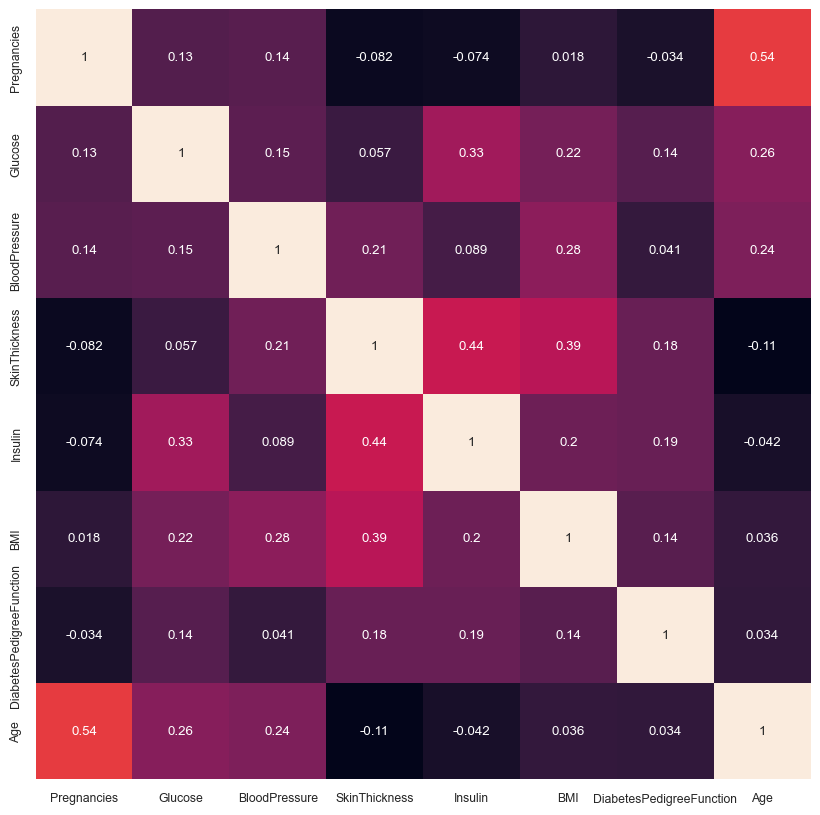

In [48]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [50]:
#결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [52]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((614, 7), (614,), (154, 7), (154,))

In [56]:
type(y_train)

pandas.core.series.Series

In [58]:
type(y_test)

pandas.core.series.Series

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import TensorDataset, DataLoader

# 텐서 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

In [66]:
# DataLoader

from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32)

In [68]:
# 모델 정의
class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(7, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)


In [72]:
# 손실함수, optimizer 설정
model = RegressionModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [74]:
# 학습 손실과 테스트 RMSE 저장 리스트
train_losses = []
test_rmse = []

# 학습 반복
num_epochs = 20
for epoch in range(num_epochs):
    model.train()  # 학습 모드
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)  # 순전파
        loss = criterion(outputs, labels)  # MSE 손실 계산

        loss.backward()  # 역전파
        optimizer.step()  # 가중치 갱신

        running_loss += loss.item()

    # epoch 당 평균 손실 저장
    train_losses.append(running_loss / len(train_loader))

    # 테스트 손실 평가
    model.eval()
    total_loss = 0.0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

    avg_test_loss = total_loss / len(test_loader)
    rmse = np.sqrt(avg_test_loss)
    test_rmse.append(rmse)

    # epoch 로그 출력
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, RMSE: {rmse:.4f}")

print("Training complete.")


C:\Users\dpfkd\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\dpfkd\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\dpfkd\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([26])) that is different to the input size (torch.Size([26, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss

Epoch 1/20, Loss: 1117.9161, RMSE: 32.2460
Epoch 2/20, Loss: 1108.3090, RMSE: 32.1426
Epoch 3/20, Loss: 1103.4850, RMSE: 32.0180
Epoch 4/20, Loss: 1096.0616, RMSE: 31.8512
Epoch 5/20, Loss: 1071.4331, RMSE: 31.6201
Epoch 6/20, Loss: 1061.4884, RMSE: 31.2975
Epoch 7/20, Loss: 1031.5000, RMSE: 30.8415
Epoch 8/20, Loss: 1001.3902, RMSE: 30.2119
Epoch 9/20, Loss: 948.5063, RMSE: 29.3961
Epoch 10/20, Loss: 893.9168, RMSE: 28.3762
Epoch 11/20, Loss: 822.2077, RMSE: 27.1579
Epoch 12/20, Loss: 749.5813, RMSE: 25.7589
Epoch 13/20, Loss: 656.6737, RMSE: 24.2407
Epoch 14/20, Loss: 591.0896, RMSE: 22.6481
Epoch 15/20, Loss: 501.6876, RMSE: 21.0419
Epoch 16/20, Loss: 424.7925, RMSE: 19.4719
Epoch 17/20, Loss: 368.4802, RMSE: 17.9616
Epoch 18/20, Loss: 312.8839, RMSE: 16.4572
Epoch 19/20, Loss: 269.5171, RMSE: 15.0522
Epoch 20/20, Loss: 224.4426, RMSE: 13.7560
Training complete.


In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

model.eval()
with torch.no_grad():
    preds = model(X_test).numpy()
    true = y_test.numpy()

# 평가 지표 계산
mse = mean_squared_error(true, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(true, preds)
r2 = r2_score(true, preds)

# 출력
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

MSE: 160.6541
RMSE: 12.6749
MAE: 10.6126
R² Score: -1.7067


MSE: 오차의 제곱 평균. 이상치에 민감함.

RMSE: MSE에 루트를 씌워 실제 단위로 비교 가능.

MAE: 단순한 절대 오차 평균. 이상치에 덜 민감.

R²: 설명력 지표. 1에 가까울수록 모델이 잘 맞는 것.

## PyTorch의 nn.MSELoss()는 보통 2차원 텐서, 즉 (batch_size, 1) 형태를 기대한다

## 텐서 변환 시 y_train과 y_test를 .view(-1, 1) 또는 .reshape(-1, 1) 로 2차원으로 바꾸기.

In [88]:
# 정확한 2차원 y 텐서 생성
#y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
#y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
# y가 이미 텐서라면
y_train_tensor = y_train.clone().detach().view(-1, 1)
y_test_tensor = y_test.clone().detach().view(-1, 1)

In [90]:
# DataLoader
train_loader2 = DataLoader(TensorDataset(X_train, y_train_tensor), batch_size=32, shuffle=True)
test_loader2 = DataLoader(TensorDataset(X_test, y_test_tensor), batch_size=32)

In [92]:
# 새 모델 정의
class AccurateRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(7, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

In [94]:
# 손실함수, optimizer 설정
model2 = AccurateRegressionModel()
criterion2 = nn.MSELoss()
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)

In [96]:
# 학습 루프
num_epochs = 20
train_losses2 = []
test_rmse2 = []

for epoch in range(num_epochs):
    model2.train()
    running_loss = 0.0
    for xb, yb in train_loader2:
        optimizer2.zero_grad()
        preds = model2(xb)
        loss = criterion2(preds, yb)
        loss.backward()
        optimizer2.step()
        running_loss += loss.item()

    train_losses2.append(running_loss / len(train_loader2))

    model2.eval()
    total_loss = 0.0
    with torch.no_grad():
        for xb, yb in test_loader2:
            preds = model2(xb)
            loss = criterion2(preds, yb)
            total_loss += loss.item()

    avg_test_loss = total_loss / len(test_loader2)
    rmse = avg_test_loss ** 0.5
    test_rmse2.append(rmse)

    print(f"[Model2] Epoch {epoch+1}/{num_epochs}, Loss: {train_losses2[-1]:.4f}, RMSE: {rmse:.4f}")

print("Training complete.")

[Model2] Epoch 1/20, Loss: 1072.5000, RMSE: 31.4779
[Model2] Epoch 2/20, Loss: 1069.2407, RMSE: 31.2795
[Model2] Epoch 3/20, Loss: 1039.8903, RMSE: 31.0097
[Model2] Epoch 4/20, Loss: 1020.5685, RMSE: 30.6315
[Model2] Epoch 5/20, Loss: 995.4831, RMSE: 30.0989
[Model2] Epoch 6/20, Loss: 962.3481, RMSE: 29.3707
[Model2] Epoch 7/20, Loss: 896.6542, RMSE: 28.4079
[Model2] Epoch 8/20, Loss: 835.1112, RMSE: 27.2099
[Model2] Epoch 9/20, Loss: 750.9236, RMSE: 25.7566
[Model2] Epoch 10/20, Loss: 665.0226, RMSE: 24.0213
[Model2] Epoch 11/20, Loss: 567.5966, RMSE: 22.0444
[Model2] Epoch 12/20, Loss: 476.3805, RMSE: 19.8581
[Model2] Epoch 13/20, Loss: 374.1631, RMSE: 17.5817
[Model2] Epoch 14/20, Loss: 285.4901, RMSE: 15.3843
[Model2] Epoch 15/20, Loss: 216.6871, RMSE: 13.4020
[Model2] Epoch 16/20, Loss: 166.6032, RMSE: 11.7858
[Model2] Epoch 17/20, Loss: 124.3760, RMSE: 10.6639
[Model2] Epoch 18/20, Loss: 108.2635, RMSE: 9.9331
[Model2] Epoch 19/20, Loss: 94.3673, RMSE: 9.4804
[Model2] Epoch 20/20

In [102]:
# 평가 모드 전환
model2.eval()

# 예측 수행
with torch.no_grad():
    preds = model2(X_test).numpy()
    true = y_test.numpy()

# 평가 지표 계산
mse = mean_squared_error(true, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(true, preds)
r2 = r2_score(true, preds)

# 결과 출력
print(f"[Model2 평가 지표]")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

[Model2 평가 지표]
MSE: 84.7812
RMSE: 9.2077
MAE: 6.8819
R² Score: -0.4284


## 두 model 성능 비교

In [105]:
def evaluate_model(name, model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        preds = model(X_test).detach().cpu().numpy()
        true = y_test.detach().cpu().numpy()

    mse = mean_squared_error(true, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, preds)
    r2 = r2_score(true, preds)

    print(f"\n✅ [{name}] 성능 평가")
    print(f"MSE : {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")
    return {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}

In [107]:
result_model1 = evaluate_model("Model1 (y 1D)", model, X_test, y_test)
result_model2 = evaluate_model("Model2 (y 2D)", model2, X_test, y_test)


✅ [Model1 (y 1D)] 성능 평가
MSE : 160.6541
RMSE: 12.6749
MAE : 10.6126
R²  : -1.7067

✅ [Model2 (y 2D)] 성능 평가
MSE : 84.7812
RMSE: 9.2077
MAE : 6.8819
R²  : -0.4284


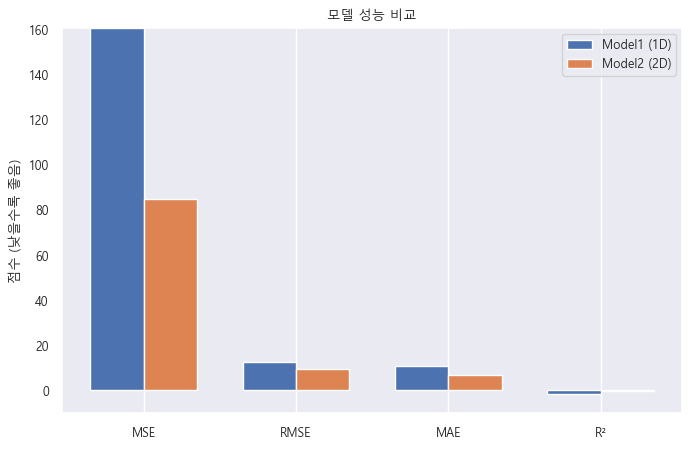

In [115]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['MSE', 'RMSE', 'MAE', 'R²']
model1_scores = list(result_model1.values())
model2_scores = list(result_model2.values())

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, model1_scores, width, label='Model1 (1D)')
plt.bar(x + width/2, model2_scores, width, label='Model2 (2D)')

# 한글 폰트 설정 (선택)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기준
plt.rcParams['axes.unicode_minus'] = False

plt.xticks(x, labels)
plt.title("모델 성능 비교")
plt.ylabel("점수 (낮을수록 좋음)")

# ✅ y축 범위 조정 (R²가 음수여도 보이게)
all_scores = model1_scores + model2_scores
plt.ylim(bottom=-10, top=max(all_scores) + 0.1)

plt.legend()
plt.grid(axis='y')
plt.show()

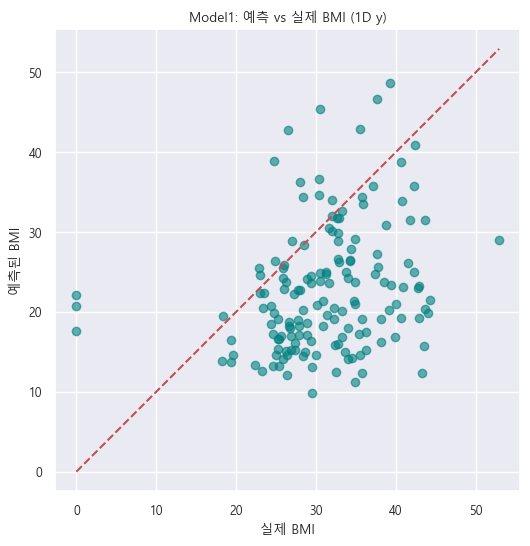

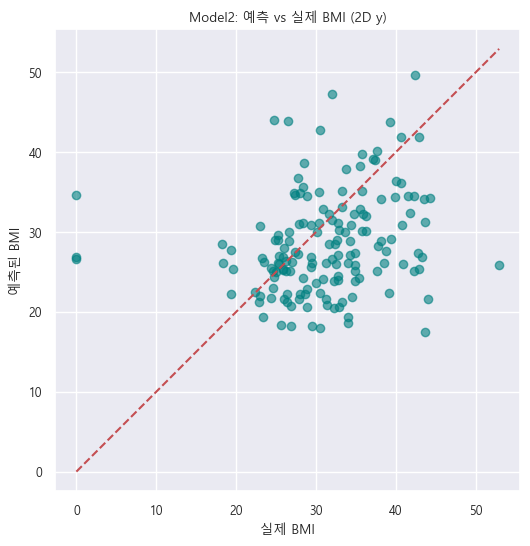

In [117]:
import matplotlib.pyplot as plt

def plot_prediction_vs_true(model, X_test, y_test, title=""):
    model.eval()
    with torch.no_grad():
        preds = model(X_test).detach().cpu().numpy()
        true = y_test.detach().cpu().numpy()

    plt.figure(figsize=(6, 6))
    plt.scatter(true, preds, alpha=0.6, color='teal')
    plt.plot([true.min(), true.max()], [true.min(), true.max()], 'r--')  # 대각선
    plt.xlabel("실제 BMI")
    plt.ylabel("예측된 BMI")
    plt.title(title or "예측 vs 실제 BMI")
    plt.grid(True)
    plt.axis("equal")  # 비율 1:1
    plt.show()

plot_prediction_vs_true(model, X_test, y_test, title="Model1: 예측 vs 실제 BMI (1D y)")
plot_prediction_vs_true(model2, X_test, y_test, title="Model2: 예측 vs 실제 BMI (2D y)")
